<a href="https://colab.research.google.com/github/connorpheraty/DS-Unit-1-Sprint-2-Data-Wrangling/blob/master/Connor_Heraty_LS_DS3_121_Scrape_and_process_data_LIVE_LESSON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Scrape and process data

Objectives
- scrape and parse web pages
- use list comprehensions
- select rows and columns with pandas

Links
-  [Automate the Boring Stuff with Python, Chapter 11](https://automatetheboringstuff.com/chapter11/)
  - Requests
  - Beautiful Soup
- [Python List Comprehensions: Explained Visually](https://treyhunner.com/2015/12/python-list-comprehensions-now-in-color/)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Subset Observations (Rows)
  - Subset Variables (Columns)
- Python Data Science Handbook
  - [Chapter 3.1](https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html), Introducing Pandas Objects
  - [Chapter 3.2](https://jakevdp.github.io/PythonDataScienceHandbook/03.02-data-indexing-and-selection.html), Data Indexing and Selection


## Scrape the titles of PyCon 2019 talks

In [0]:
url = 'https://us.pycon.org/2019/schedule/talks/list/'

In [0]:
import bs4
import requests

result = requests.get(url)

In [134]:
type(result.text)

str

In [0]:
soup = bs4.BeautifulSoup(result.text)

In [12]:
len(soup.select('h2'))

95

In [0]:
soup.select('h2')

In [0]:
first = soup.select('h2')[0]

In [20]:
type(first.text)

str

In [21]:
first.text

'\n\n        5 Steps to Build Python Native GUI Widgets for BeeWare\n      \n'

In [0]:
text_only = first.text.strip()

In [23]:
text_only

'5 Steps to Build Python Native GUI Widgets for BeeWare'

In [0]:
last = soup.select('h2')[-1]

In [26]:
last.text.strip()

"Working with Time Zones: Everything You Wish You Didn't Need to Know"

In [32]:
title_lst = []

for tag in soup.select('h2'):
  title = tag.text.strip()
  title_lst.append(title)
  
print(title_lst)

['5 Steps to Build Python Native GUI Widgets for BeeWare', '8 things that happen at the dot:  Attribute Access & Descriptors', 'Account Security Patterns: How Logged-In Are you?', 'Ace Your Technical Interview Using Python', 'Advanced asyncio: Solving Real-world Production Problems', 'A Guide to Software Engineering for Visually Impaired', 'A Medieval DSL? Parsing Heraldic Blazons with Python!', 'A New Era in Python Governance', 'API Evolution the Right Way', 'A Right Stitch-up: Creating embroidery patterns with Pillow', 'A Snake in the Bits: Security Automation with Python', 'Assets in Django without losing your hair', 'Attracting the Invisible Contributors', 'Beyond Two Groups: Generalized Bayesian A/B[/C/D/E...] Testing', 'Break the Cycle: Three excellent Python tools to automate repetitive tasks', 'Building a Culture of Observability', 'Building an Open Source Artificial Pancreas', 'Building reproducible Python applications for secured environments', 'But, Why is the (Django) Admin

In [0]:
titles = [tag.text.strip()
         for tag in soup.select('h2')]

In [35]:
type(titles), len(titles)

(list, 95)

## 5 ways to look at long titles

Let's define a long title as greater than 80 characters

### 1. For Loop

In [36]:
tit_lst = []

for title in titles:
  if len(title) > 80:
    tit_lst.append(title)

print(tit_lst)

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks', 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders', 'How to engage Python contributors in the long term? Tech is easy, people are hard.', 'Lessons learned from building a community of Python users among thousands of analysts', 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting', 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.', 'Put down the deep learning: When not to use neural networks and what to do instead', 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']


### 2. List Comprehension

In [0]:
long_titles = [x 
              for x in titles if len(titles) > 80]

### 3. Filter with named function

In [42]:
def long(title):
  return len(title) > 80

long('Python is good')
    

False

In [46]:
list(filter(long, titles))

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders',
 'How to engage Python contributors in the long term? Tech is easy, people are hard.',
 'Lessons learned from building a community of Python users among thousands of analysts',
 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting',
 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.',
 'Put down the deep learning: When not to use neural networks and what to do instead',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']

In [48]:
list(filter(lambda t: len(t) > 80, titles))

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders',
 'How to engage Python contributors in the long term? Tech is easy, people are hard.',
 'Lessons learned from building a community of Python users among thousands of analysts',
 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting',
 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.',
 'Put down the deep learning: When not to use neural networks and what to do instead',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']

### 4. Filter with anonymous function

In [49]:
list(filter(lambda t: len(t) > 80, titles))

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders',
 'How to engage Python contributors in the long term? Tech is easy, people are hard.',
 'Lessons learned from building a community of Python users among thousands of analysts',
 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting',
 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.',
 'Put down the deep learning: When not to use neural networks and what to do instead',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']

### 5. Pandas

pandas documentation: [Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html)

In [0]:
import pandas as pd
pd.options.display.max_colwidth = 200

In [62]:
df = pd.DataFrame({'title': titles})
df.shape

(95, 1)

In [63]:
df[ df['title'].str.len() > 80 ]

,title
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks
38,Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders
43,"How to engage Python contributors in the long term? Tech is easy, people are hard."
48,Lessons learned from building a community of Python users among thousands of analysts
50,"Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting"
60,"One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company."
66,Put down the deep learning: When not to use neural networks and what to do instead
84,Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline


In [64]:
df['title'].str.len() > 80

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
      ...  
65    False
66     True
67    False
68    False
69    False
70    False
71    False
72    False
73    False
74    False
75    False
76    False
77    False
78    False
79    False
80    False
81    False
82    False
83    False
84     True
85    False
86    False
87    False
88    False
89    False
90    False
91    False
92    False
93    False
94    False
Name: title, Length: 95, dtype: bool

In [65]:
condition = df['title'].str.len() > 80
df[condition]

,title
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks
38,Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders
43,"How to engage Python contributors in the long term? Tech is easy, people are hard."
48,Lessons learned from building a community of Python users among thousands of analysts
50,"Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting"
60,"One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company."
66,Put down the deep learning: When not to use neural networks and what to do instead
84,Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline


## Make new dataframe columns

pandas documentation: [apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html)

### title length

In [0]:
df['title length'] = df['title'].apply(len)

In [68]:
df.head()

,title,title length
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54
1,8 things that happen at the dot: Attribute Access & Descriptors,64
2,Account Security Patterns: How Logged-In Are you?,49
3,Ace Your Technical Interview Using Python,41
4,Advanced asyncio: Solving Real-world Production Problems,56


In [74]:
df[ df['title length'] > 80 ]

,title,title length
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks,89
38,Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders,81
43,"How to engage Python contributors in the long term? Tech is easy, people are hard.",82
48,Lessons learned from building a community of Python users among thousands of analysts,85
50,"Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting",82
60,"One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.",95
66,Put down the deep learning: When not to use neural networks and what to do instead,82
84,Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline,90


In [75]:
df.loc[ df['title length'] > 80, 'title length']

30    89
38    81
43    82
48    85
50    82
60    95
66    82
84    90
Name: title length, dtype: int64

### long title

In [76]:
df['long title'] = df['title length'] > 80

df.shape

(95, 3)

In [77]:
df.head()

,title,title length,long title
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False
2,Account Security Patterns: How Logged-In Are you?,49,False
3,Ace Your Technical Interview Using Python,41,False
4,Advanced asyncio: Solving Real-world Production Problems,56,False


In [78]:
df[ df['long title']==True]

,title,title length,long title
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks,89,True
38,Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders,81,True
43,"How to engage Python contributors in the long term? Tech is easy, people are hard.",82,True
48,Lessons learned from building a community of Python users among thousands of analysts,85,True
50,"Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting",82,True
60,"One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.",95,True
66,Put down the deep learning: When not to use neural networks and what to do instead,82,True
84,Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline,90,True


### first letter

In [0]:
df['first letter'] = df['title'].str[0]

In [86]:
df[df['first letter'] == 'P']

,title,title length,long title,first letter
61,Plan your next eclipse viewing with Jupyter and geopandas,57,False,P
62,Plugins: Adding Flexibility to Your Apps,40,False,P
63,Plug-n-Stream Player Piano: Signal Processing With Python,57,False,P
64,Practical decorators,20,False,P
65,Programmatic Notebooks with papermill,37,False,P
66,Put down the deep learning: When not to use neural networks and what to do instead,82,True,P
67,"Python on Windows is Okay, Actually",35,False,P
68,Python Security Tools,21,False,P


In [89]:
df[df['title'].str.startswith('P')]

,title,title length,long title,first letter
61,Plan your next eclipse viewing with Jupyter and geopandas,57,False,P
62,Plugins: Adding Flexibility to Your Apps,40,False,P
63,Plug-n-Stream Player Piano: Signal Processing With Python,57,False,P
64,Practical decorators,20,False,P
65,Programmatic Notebooks with papermill,37,False,P
66,Put down the deep learning: When not to use neural networks and what to do instead,82,True,P
67,"Python on Windows is Okay, Actually",35,False,P
68,Python Security Tools,21,False,P


### word count

Using [`textstat`](https://github.com/shivam5992/textstat)

In [90]:
!pip install textstat

    100% |████████████████████████████████| 3.0MB 6.9MB/s 


In [0]:
import textstat 

In [0]:
df['title word count'] = df['title'].apply(textstat.lexicon_count)

In [96]:
df.head()

,title,title length,long title,first letter,title word count
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7
3,Ace Your Technical Interview Using Python,41,False,A,6
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6


In [99]:
df.shape

(95, 5)

In [100]:
df[ df['title word count'] <= 3 ]

,title,title length,long title,first letter,title word count
56,Measuring Model Fairness,24,False,M,3
64,Practical decorators,20,False,P,2
68,Python Security Tools,21,False,P,3


## Rename column

`title length` --> `title character count`

pandas documentation: [rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)

In [0]:
df = df.rename(columns={'title length': 'title character count'})

In [103]:
df.head()

,title,title character count,long title,first letter,title word count
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7
3,Ace Your Technical Interview Using Python,41,False,A,6
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6


## Analyze the dataframe

### Describe

pandas documentation: [describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

In [105]:
df.describe(include='all')

,title,title character count,long title,first letter,title word count
count,95,95.000000,95,95,95.000000
unique,95,NaN,2,22,NaN
top,Supporting Engineers with Mental Health Issues,NaN,False,T,NaN
freq,1,NaN,87,12,NaN
mean,NaN,51.347368,NaN,NaN,7.978947
std,NaN,17.729509,NaN,NaN,3.218890
min,NaN,20.000000,NaN,NaN,2.000000
25%,NaN,37.000000,NaN,NaN,6.000000
50%,NaN,52.000000,NaN,NaN,7.000000
75%,NaN,62.000000,NaN,NaN,9.500000


In [106]:
df.describe(exclude='number')

,title,long title,first letter
count,95,95,95
unique,95,2,22
top,Supporting Engineers with Mental Health Issues,False,T
freq,1,87,12


### Sort values

pandas documentation: [sort_values](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)

Five shortest titles, by character count

In [108]:
df.sort_values(by='title character count').head(5)

,title,title character count,long title,first letter,title word count
64,Practical decorators,20,False,P,2
68,Python Security Tools,21,False,P,3
89,Type hinting (and mypy),23,False,T,4
82,The Zen of Python Teams,23,False,T,5
56,Measuring Model Fairness,24,False,M,3


Titles sorted reverse alphabetically

In [110]:
df.sort_values(by='first letter', ascending=False).head()

,title,title character count,long title,first letter,title word count
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks,89,True,¡,12
88,to GIL or not to GIL: the Future of Multi-Core (C)Python,56,False,t,11
94,Working with Time Zones: Everything You Wish You Didn't Need to Know,68,False,W,12
93,Wily Python: Writing simpler and more maintainable Python,57,False,W,8
92,What's new in Python 3.7,24,False,W,5


### Get value counts

pandas documentation: [value_counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)


Frequency counts of first letters

In [111]:
df['first letter'].value_counts()

T    12
A    11
M     8
P     8
E     7
S     6
B     6
H     5
W     4
L     4
G     4
D     4
C     3
F     3
R     2
I     2
t     1
¡     1
8     1
U     1
5     1
O     1
Name: first letter, dtype: int64

Percentage of talks with long titles

In [115]:
df['long title'].value_counts(normalize=True)

False    0.915789
True     0.084211
Name: long title, dtype: float64

### Plot

pandas documentation: [Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)





Top 5 most frequent first letters

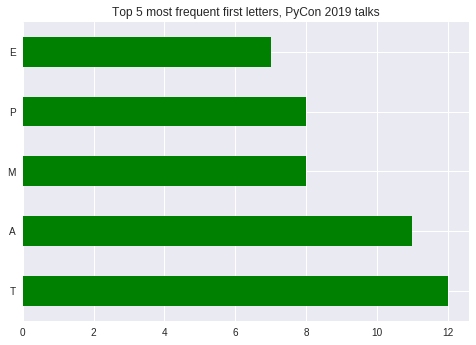

In [125]:
(df['first letter']
.value_counts()
.head(5)
.plot
.barh(color='green',
     title='Top 5 most frequent first letters, PyCon 2019 talks'));

Histogram of title lengths, in characters

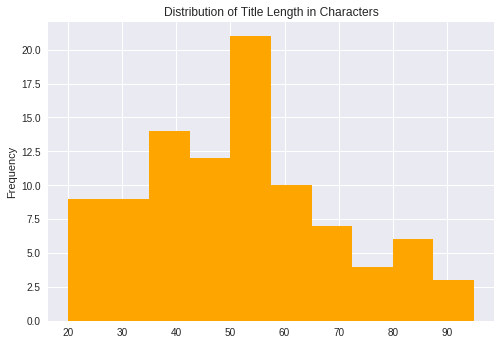

In [130]:
df['title character count'].plot.hist(color='orange', title = 'Distribution of Title Length in Characters');

# Assignment

**Scrape** the talk descriptions. Hint: `soup.select('.presentation-description')`

**Make** new columns in the dataframe:
- description
- description character count
- description word count

**Describe** all the dataframe's columns. What's the average description word count? The minimum? The maximum?

**Answer** the question: Which descriptions could fit in a tweet?


# Stretch Challenge

**Make** another new column in the dataframe:
- description grade level (you can use [this `textstat` function](https://github.com/shivam5992/textstat#the-flesch-kincaid-grade-level) to get the Flesh-Kincaid grade level)

**Answer** the question: What's the distribution of grade levels? Plot a histogram.

**Be aware** that [Textstat has issues when sentences aren't separated by spaces](https://github.com/shivam5992/textstat/issues/77#issuecomment-453734048). (A Lambda School Data Science student helped identify this issue, and emailed with the developer.) 

Also, [BeautifulSoup doesn't separate paragraph tags with spaces](https://bugs.launchpad.net/beautifulsoup/+bug/1768330).

So, you may get some inaccurate or surprising grade level estimates here. Don't worry, that's ok — but optionally, can you do anything to try improving the grade level estimates?

## **Objectives**

1.  Scape the talk descriptions

2. Make new columns in the dataframe:
    
    a. description
    b. description character count
    c. description word count
    
3.  Describe all the dataframe's colums.

    a. Average description word count
    b. Minimum
    c. Maximum
    
4.  Which descriptions could fit in a tweet?
    

## Objective 1

In [156]:
# Isolate the html container that contains talk descriptions

first = soup.select('div.presentation-description')[0]
first

<div class="presentation-description">Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know where to start?

BeeWare is a set of software libraries for cross-platform native app development from a single Python codebase and tools to simplify app deployment. The project aims to build, deploy, and run apps for Windows, Linux, macOS, Android, iPhone, and the web. It is native because it is actually using your platform's native GUI widgets, not a theme, icon pack, or webpage wrapper.

This talk will teach you how Toga, the BeeWare GUI toolkit, is architected and then show you how you can contribute to Toga by creating your own GUI widget in five easy steps.</div>

In [157]:
#Eliminate all characters not related to the talk description in our string
first.text.strip()

"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know where to start?\r\n\r\nBeeWare is a set of software libraries for cross-platform native app development from a single Python codebase and tools to simplify app deployment. The project aims to build, deploy, and run apps for Windows, Linux, macOS, Android, iPhone, and the web. It is native because it is actually using your platform's native GUI widgets, not a theme, icon pack, or webpage wrapper.\r\n\r\nThis talk will teach you how Toga, the BeeWare GUI toolkit, is architected and then show you how you can contribute to Toga by creating your own GUI widget in five easy steps."

In [0]:
# Repeat for all descriptions in our list
talk_description = [tag.text.strip()
         for tag in soup.select('div.presentation-description')]

## Objective 2

In [162]:
# Create pandas database out of our cleaned list
df = pd.DataFrame({'Description': talk_description})
df.shape

(95, 1)

In [163]:
# Description column created
df.head()

,Description
0,"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know whe..."
1,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what ..."
2,"Account security means making sure your users are only ones who can access their accounts. Account takeovers happen for a variety of reasons -- password re-use, compromised computers, guessable pa..."
3,Do you feel overwhelmed by the prospect of having to find a new software engineering job because you dread the technical interviewing process? Have you been putting off submitting your job applica...
4,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just like we did.\r\n\r\nBy building a simplified chaos monkey service, we will walk through how to creat..."


In [168]:
# Description Character Count created
df['Description Character Count'] = df['Description'].apply(len)
df.head()

,Description,Description Character Count
0,"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know whe...",766
1,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what ...",296
2,"Account security means making sure your users are only ones who can access their accounts. Account takeovers happen for a variety of reasons -- password re-use, compromised computers, guessable pa...",426
3,Do you feel overwhelmed by the prospect of having to find a new software engineering job because you dread the technical interviewing process? Have you been putting off submitting your job applica...,507
4,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just like we did.\r\n\r\nBy building a simplified chaos monkey service, we will walk through how to creat...",647


In [170]:
# Description Word Count created
df['Description Word Count'] = df['Description'].apply(textstat.lexicon_count)
df.head()

,Description,Description Character Count,Description Word Count
0,"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know whe...",766,135
1,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what ...",296,56
2,"Account security means making sure your users are only ones who can access their accounts. Account takeovers happen for a variety of reasons -- password re-use, compromised computers, guessable pa...",426,66
3,Do you feel overwhelmed by the prospect of having to find a new software engineering job because you dread the technical interviewing process? Have you been putting off submitting your job applica...,507,84
4,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just like we did.\r\n\r\nBy building a simplified chaos monkey service, we will walk through how to creat...",647,96


## **Objective 3**

The average description word count is 130.82

The minimum words used is 20

The maximum word used is 421

In [173]:
df.describe(include='all')

,Description,Description Character Count,Description Word Count
count,95,95.000000,95.000000
unique,95,NaN,NaN
top,Do you feel overwhelmed by the prospect of having to find a new software engineering job because you dread the technical interviewing process? Have you been putting off submitting your job applica...,NaN,NaN
freq,1,NaN,NaN
mean,NaN,813.073684,130.821053
std,NaN,415.988191,64.357872
min,NaN,121.000000,20.000000
25%,NaN,542.500000,85.500000
50%,NaN,718.000000,116.000000
75%,NaN,1016.500000,165.000000


## Objective 4

In [176]:
# Creating Tweet-able column with boolean values to determine whether the talk description could fit within twitters 280 character tweet limit.
df['Tweet-able?'] = df['Description Character Count'] < 280
df.head()

,Description,Description Character Count,Description Word Count,Tweet-able?
0,"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know whe...",766,135,False
1,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what ...",296,56,False
2,"Account security means making sure your users are only ones who can access their accounts. Account takeovers happen for a variety of reasons -- password re-use, compromised computers, guessable pa...",426,66,False
3,Do you feel overwhelmed by the prospect of having to find a new software engineering job because you dread the technical interviewing process? Have you been putting off submitting your job applica...,507,84,False
4,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just like we did.\r\n\r\nBy building a simplified chaos monkey service, we will walk through how to creat...",647,96,False


In [177]:
# Created a subset variable to determine which talk descriptions could fit in a single tweet.
df[ df['Tweet-able?']]

,Description,Description Character Count,Description Word Count,Tweet-able?
54,"Learn how to make music with Python, SuperCollider and FoxDot. We'll create a song together in this live coded adventure.",121,20,True


In [180]:
# Confirmed above finding
df['Tweet-able?'].value_counts()

False    94
True      1
Name: Tweet-able?, dtype: int64

## Stretch Challenge

In [0]:
# Grade level function on a string of text

def scores(x):
  
  for i in x:
    text_score = textstat.flesch_kincaid_grade(x)
    
  return text_score

In [0]:
# Applies score function on dataframe

df['Description Grade Level'] = df['Description'].apply(scores)

In [246]:
df.head()

,Description,Description Character Count,Description Word Count,Tweet-able?,Description Grade Level
0,"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know whe...",766,135,False,14.1
1,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what ...",296,56,False,10.7
2,"Account security means making sure your users are only ones who can access their accounts. Account takeovers happen for a variety of reasons -- password re-use, compromised computers, guessable pa...",426,66,False,8.5
3,Do you feel overwhelmed by the prospect of having to find a new software engineering job because you dread the technical interviewing process? Have you been putting off submitting your job applica...,507,84,False,17.3
4,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just like we did.\r\n\r\nBy building a simplified chaos monkey service, we will walk through how to creat...",647,96,False,10.8


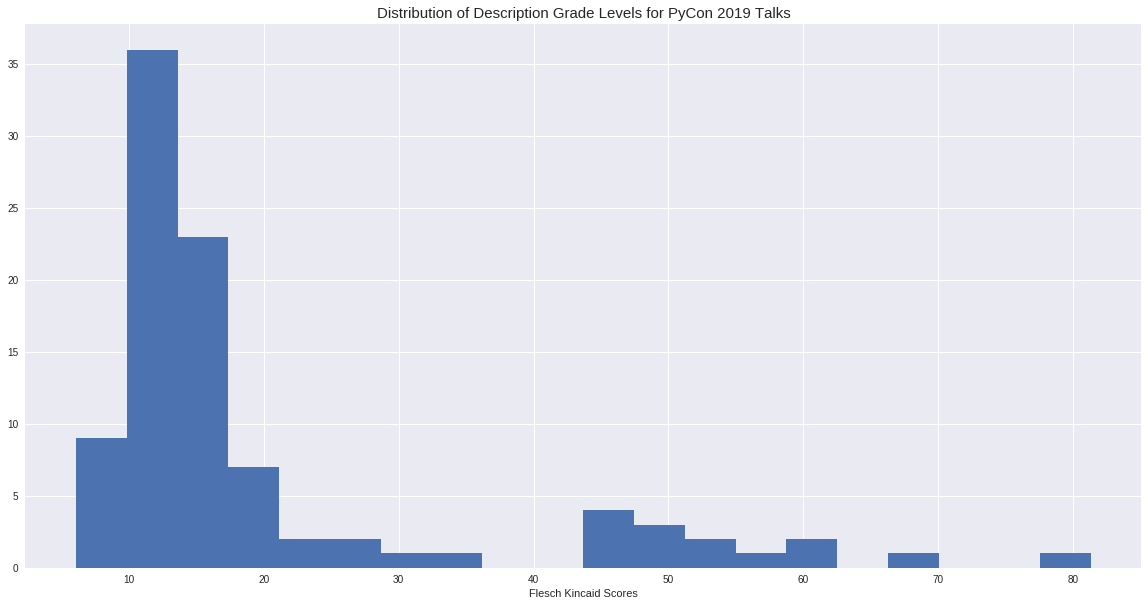

In [261]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.xlabel('Flesch Kincaid Scores')
plt.title('Distribution of Description Grade Levels for PyCon 2019 Talks',size=15)

plt.hist(df['Description Grade Level'], bins=20);

In [0]:
# We will make a seperate dataframe with all descriptions above 50 to analyze

unreadable_desc = df[ df['Description Grade Level'] > 60]

In [0]:
unreadable_lst = list(unreadable_desc['Description'])

In [290]:
# Create list of three highest scores
unreadable_lst[0:3]

["If we knew all of the bugs we needed to write tests for, wouldn't we just... not write the bugs?  So how can testing find bugs that nobody would think of?\r\n\r\nThe answer is to have a computer *write your tests for you!*  You declare what kind of input should work - from 'an integer' to 'matching this regex' to 'this Django model' and write a test which should always pass... then Hypothesis searches for the smallest inputs that cause an error.\r\n\r\nIf you’ve ever written tests that didn't find all your bugs, this talk is for you.  We'll cover the theory of property-based testing, a worked example, and then jump into a whirlwind tour of the library: how to use, define, compose, and infer strategies for input; properties and testing tactics for your code; and how to debug your tests if everything seems to go wrong.\r\n\r\nBy the end of this talk, you'll be ready to find real bugs with Hypothesis in anything from web apps to big data pipelines to CPython itself.  Be the change you w

In [0]:
# I have inputted all three descriptions into 'http://www.hemingwayapp.com/' for further analysis

## Improving Description Readability

The distribution of Description Grade Levels skews to the left which implies most descriptions are easy to read . To get a better understanding of how the algorithm works, I further analyzed the three hardest to read descriptions. 

The three highest scores shared two properties: long run-on sentences and technical jargon. 

Due to the nature of the conference, technical jargon is often unavoidable when explaining the subject matter of the talk. Lowering its use may decrease the quality of the description. If one's goal was to reduce their Flesch Kincaid score, they may want to consider reducing their use of technical jargon.

Reducing the use of run-on sentences is an excellent way to make a description easier to read. It can also be done without decreasing the quality of the description!